# Esercizio 1

**Consumo di alcol per paese**

In [7]:
# Carichiamo il DataFrame

# Importiamo il modulo 'pandas'
import pandas as pd

# Importiamo il DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [20]:
# Visualizziamo i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

# Utilizziamo il metodo 'sort_values' e salviamo i primi 10 elementi
top_10 = df.sort_values('total_litres_of_pure_alcohol', ascending=False, inplace=False).head(10)

# Stampare il risultato
top_10[['country', 'total_litres_of_pure_alcohol']]

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
61,France,11.8
45,Czech Republic,11.8
141,Russian Federation,11.5
99,Luxembourg,11.4
155,Slovakia,11.4
81,Ireland,11.4


In [17]:
# Calcoliamo la media del consumo di birra, vino, e distillati

# Utilizziamo il metodo 'mean'
print(f"Il valore medio di consumo di birra è di {int(df['beer_servings'].mean())} birre")
print(f"Il valore medio di consumo di distillati è di {int(df['spirit_servings'].mean())} distillati")
print(f"Il valore medio di consumo di vino è di {int(df['wine_servings'].mean())} bottiglie")

Il valore medio di consumo di birra è di 106 birre
Il valore medio di consumo di distillati è di 80 distillati
Il valore medio di consumo di vino è di 49 bottiglie


In [22]:
# Creiamo una nuova colonna alcohol_index che sia: (beer_servings + wine_servings + spirit_servings) / 3

# Aggiungiamo la nuova colonna
df['alcohol_index'] = (df.beer_servings + df.wine_servings + df.spirit_servings) / 3
df[['country', 'alcohol_index']]

,country,alcohol_index
0,Afghanistan,0.000000
1,Albania,91.666667
2,Algeria,13.000000
3,Andorra,231.666667
4,Angola,106.333333
...,...,...
188,Venezuela,145.333333
189,Vietnam,38.000000
190,Yemen,2.000000
191,Zambia,18.333333


In [23]:
# Troviamo il paese con il valore massimo di alcohol_index

# Riutilizziamo il metodo 'sort_values'
last = df.sort_values(by='alcohol_index', ascending=False, inplace=False).head(1)
last[['country', 'total_litres_of_pure_alcohol']]

,country,total_litres_of_pure_alcohol
3,Andorra,12.4


In [30]:
# Filtriamo solo i paesi che consumano più di 100 birre all’anno

# Imponiamo la condizione
df[df['beer_servings'] > 100]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,alcohol_index
3,Andorra,245,138,312,12.4,231.666667
4,Angola,217,57,45,5.9,106.333333
5,Antigua & Barbuda,102,128,45,4.9,91.666667
6,Argentina,193,25,221,8.3,146.333333
8,Australia,261,72,212,10.4,181.666667
...,...,...,...,...,...,...
182,United Kingdom,219,126,195,10.4,180.000000
184,USA,249,158,84,8.7,163.666667
185,Uruguay,115,35,220,6.6,123.333333
188,Venezuela,333,100,3,7.7,145.333333


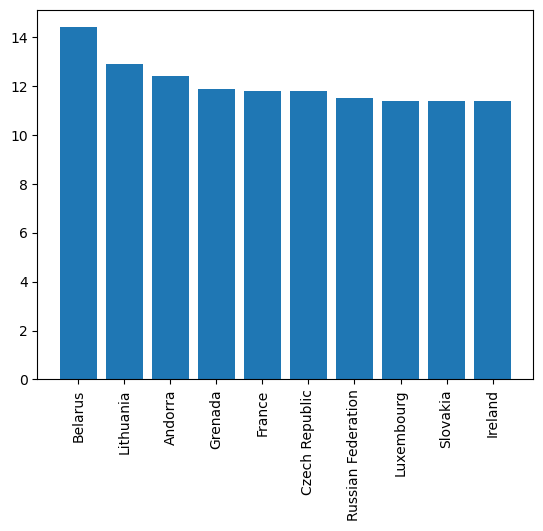

In [39]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.bar(top_10['country'], top_10['total_litres_of_pure_alcohol'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='country'>

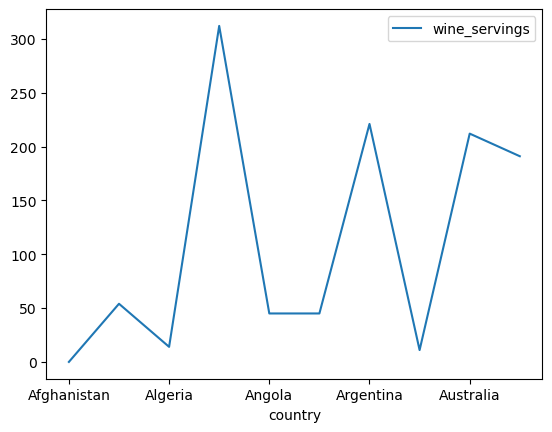

In [42]:
df.sort_values('country')
df.head(10).plot(kind='line', y='wine_servings', x='country')

# Esercizio 2


**Analisi offerte di lavoro**


In [44]:
# Cariciamo il dataset

import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df2 = dataset['train'].to_pandas()

df2['job_posted_date'] = pd.to_datetime(df2['job_posted_date'])
df2.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


nan
